<a href="https://colab.research.google.com/github/rashipachauri/MachineLearning/blob/main/AmazonproductAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
df = pd.read_csv('/content/Reviews.csv',)
df = df[['Text', 'Score']].dropna()

In [6]:
df = df[df['Score'] != 3].copy()
df.loc[:, 'Sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

In [7]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


In [8]:
def clean_text(text):

    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['Cleaned_Text'] = df['Text'].apply(clean_text)

In [9]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Text']).toarray()
y = df['Sentiment'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Confusion Matrix:", confusion_matrix(y_test, y_pred))
print(" Classification Report:", classification_report(y_test, y_pred))

 Accuracy: 0.8933173509139946
 Confusion Matrix: [[ 382  681]
 [  31 5580]]
 Classification Report:               precision    recall  f1-score   support

           0       0.92      0.36      0.52      1063
           1       0.89      0.99      0.94      5611

    accuracy                           0.89      6674
   macro avg       0.91      0.68      0.73      6674
weighted avg       0.90      0.89      0.87      6674



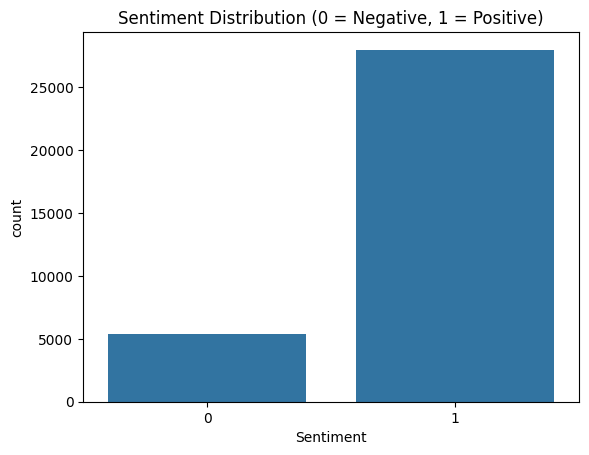

In [13]:
sns.countplot(x=df['Sentiment'])
plt.title("Sentiment Distribution (0 = Negative, 1 = Positive)")
plt.show()

['tfidf_vectorizer.pkl']